# Prova 1 - Questão 2

Autora: Luiza Lober de Souza Piva, nUSP: 9302292

### Configuração

In [ ]:
#Ler e manipular dataframes e valores
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

#Importar os dados
import requests as rq
from io import BytesIO

In [ ]:
#Cria o dataframe com as cotas dos deputados
url = 'https://raw.githubusercontent.com/luizalober/doc-disciplinas/main/estatistica-2s2022/p1/Cotas.csv'   #adicionei no github por erros na importacão via edisciplinas
data = rq.get(url).content
df = pd.read_csv(BytesIO(data), sep=';', encoding='latin-1')    #esta tabela não é decodificada por utf-8. Uso latin-1 como alternativa

In [ ]:
#Visualizando os dados:
df

,REEMBOLSO,NOME DO PARLAMENTAR,ANO,SUBQUOTA TRANSLATED,FORNECEDOR,VALOR
0,0,ABOU ANNI,2020,Serviços postais,CORREIOS - MALA DIRETA POSTAL BÁSICA-00.000.00...,88.16
1,0,ABOU ANNI,2020,Serviços postais,CORREIOS - MALA DIRETA POSTAL BÁSICA-00.000.00...,121.34
2,0,ABOU ANNI,2020,Serviços postais,CORREIOS - MALA DIRETA POSTAL BÁSICA-00.000.00...,1274.13
3,0,ALENCAR SANTANA BRAGA,2020,Serviços postais,CORREIOS - SEDEX CONVENCIONAL COM AR-00.000.00...,61.15
4,7002207,ALENCAR SANTANA BRAGA,2020,Combustíveis e lubrificantes,AUTO POSTO NOVO GAMA LTDA-20.168.440/0001-60,111.92
...,...,...,...,...,...,...
831,1723468,VITOR LIPPI,2020,Emissão bilhete aéreo,Cia Aérea - AZUL-09.296.295/0001-60,395.28
832,0,VITOR LIPPI,2020,Serviços postais,CORREIOS - ENCOMENDA PAC-00.000.000/0000-07,484.70
833,6997561,VITOR LIPPI,2020,Combustíveis e lubrificantes,SERAUT AUTO POSTO LTDA-59.690.438/0001-91,1115.86
834,7001541,VITOR LIPPI,2020,Manutenção de escritório de apoio à atividade ...,TECHLAN SERVICOS E COMERCIALIZACAO EM TECNOLOG...,2344.00


In [ ]:
#Mostra o número de deputados considerados:
deputados = df['NOME DO PARLAMENTAR'].unique()
print('Total de deputados: ', len(deputados))

Total de deputados:  63


In [ ]:
#Cria uma nova coluna para contar o número de cotas por deputado
num_orcamentos = []

for dep in range(0,len(deputados), 1):
  dados = df.loc[df['NOME DO PARLAMENTAR'] == deputados[dep]]
  num_orcamentos.append(len(dados['VALOR']))

Note que, da tabela acima, cada deputado tem cota em mais de uma categoria, sendo estas mostradas em `SUBQUOTA TRANSLATED`. Vamos agora criar 
*  `df_total`, representando a soma de todas as cotas para cada deputado;
*  `df_cat`, onde queremos o valor de gastos por categoria, somando o valor gasto dos deputados para cada uma das categorias.

In [ ]:
df_total = df.groupby('NOME DO PARLAMENTAR').sum()    #agrupa por deputado e soma.
df_total['ANO'] = '2020'   #muda o ano para 2020, que é o valor original desta coluna no dataframe anterior
df_total.insert(len(df_total.columns), 'N_COTAS', num_orcamentos)   #adiciona o número de orçamentos para um dado deputado
df_total

,REEMBOLSO,ANO,VALOR,N_COTAS
NOME DO PARLAMENTAR,,,,
ABOU ANNI,0,2020,1483.63,3
ALENCAR SANTANA BRAGA,35011688,2020,6736.31,6
ALEX MANENTE,77011868,2020,5247.18,12
ALEXANDRE FROTA,62996543,2020,19895.61,14
ALEXANDRE LEITE,41994356,2020,1245.26,7
...,...,...,...,...
TIRIRICA,21006639,2020,892.29,3
VANDERLEI MACRIS,238171531,2020,17752.34,34
VICENTINHO,6997360,2020,620.55,3


In [ ]:
df_cat = df.groupby('SUBQUOTA TRANSLATED').sum()    #agrupa por categoria e soma por deputado.
df_cat['ANO'] = '2020'   #muda o ano para 2020, que é o valor original desta coluna no dataframe anterior

#Aqui, conta o número de vezes que tal cota foi requisitada e insere este valor na tabela
num_requisitos = []
categorias = df['SUBQUOTA TRANSLATED'].unique()

for cat in range(0,len(categorias), 1):
  dados = df.loc[df['SUBQUOTA TRANSLATED'] == categorias[cat]]
  num_requisitos.append(len(dados['VALOR']))

df_cat.insert(len(df_cat.columns), 'REQUISIÇÕES', num_requisitos)   #adiciona o número de deputados que tem cota nessa categoria

#mostra a tabela resultante
df_cat

,REEMBOLSO,ANO,VALOR,REQUISIÇÕES
SUBQUOTA TRANSLATED,,,,
Assinatura de publicações,21006778,2020,347.80,177
Combustíveis e lubrificantes,1638372662,2020,58480.60,234
"Consultorias, pesquisas e trabalhos técnicos",42012185,2020,43000.00,39
Divulgação da atividade parlamentar,273003960,2020,247381.41,35
Emissão bilhete aéreo,36190986,2020,22639.77,102
Fornecimento de alimentação do parlamentar,294181967,2020,1749.87,42
"Hospedagem ,exceto do parlamentar no distrito federal",231032289,2020,9192.11,18
Locação ou fretamento de veículos automotores,126044390,2020,66639.03,6
Manutenção de escritório de apoio à atividade parlamentar,714028039,2020,99672.45,4


Note que existem múltiplos valores de requisições que são diferentes do que o total de deputados. Ou seja, o uso entre eles é bastante distinto.

## Cálculos

Aqui, podemos abordar o problema da média da cota gasta de três formas:
*  Através da média do total de cotas para *cada deputado* (`df_total`), isto é, ignorando categorias;
*  Fazendo o cálculo por categorias (`df_cat`).
*  Calculando a média *por deputado* (`df`) e extraindo os intervalos de confiança individualmente;

Para todas essas abordagens, será utilizada a função `IntervaloDeConfiancaMedia()` abaixo para calcular os intervalos de confiança, que deriva do resultado da aplicação do T.C.L. e do teorema de Slutsky e utiliza a distribuição de Student para o cálculo dos intervalos:

$$\frac{ \overline{X} - \mu }{S / \sqrt n} \sim t_{(n-1)}$$

onde $\overline{X}$ é a média amostral, $E(X) = \mu$, $S$ é um parâmetro de escala (variância desconhecida) e $n$ é o tamanho total da amostra. Todos os intervalos serão aproximados, dado que eles são calculados em relação à médias.

A discussão sobre a validade desse cálculo está na seção **Gráficos**.

In [ ]:
def IntervaloDeConfiancaMedia(data, confianca=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), sp.stats.sem(a)
    #Cria o intervalo de confiança a partir da distribuição de Student, já que a 
    #variância não é conhecida.
    h = se * sp.stats.t.ppf((1 + confianca) / 2., n-1)
    return m, m-h, m+h

### Média de cotas de todos os deputados

In [ ]:
#Aqui, precisamos só de três valores: média-janela, média e média+janela
m0, m1, m2 = IntervaloDeConfiancaMedia(df_total['VALOR'], confianca=0.95)

#Resultados:
print('Intervalo de confiança, assumindo 95% de confiança: ', m2-m1)
print('Média: ', m0)
print('Menor valor: ', m1)
print('Maior valor: ', m2)

Intervalo de confiança, assumindo 95% de confiança:  5228.125522320108
Média:  9614.651746031746
Menor valor:  7000.588984871692
Maior valor:  12228.7145071918


In [ ]:
df_total['VALOR'].describe()

count       63.000000
mean      9614.651746
std      10379.577580
min         26.010000
25%       1819.885000
50%       6157.810000
75%      14627.840000
max      50469.660000
Name: VALOR, dtype: float64

Podemos ver que existem valores de cotas que variam significativamente da média.

### Média por categoria

In [ ]:
#Aqui, também vamos utilizar somente três valores: média-janela, média e média+janela
m0, m1, m2 = IntervaloDeConfiancaMedia(df_cat['VALOR'], confianca=0.95)

#Resultados:
print('Intervalo de confiança, assumindo 95% de confiança: ', m2-m1)
print('Média: ', m0)
print('Menor valor: ', m1)
print('Maior valor: ', m2)

Intervalo de confiança, assumindo 95% de confiança:  75800.9093288754
Média:  43265.93285714286
Menor valor:  5365.478192705174
Maior valor:  81166.38752158056


In [ ]:
df_cat['VALOR'].describe()

count        14.000000
mean      43265.932857
std       65641.813370
min         347.800000
25%        6838.475000
50%       17585.020000
75%       54610.450000
max      247381.410000
Name: VALOR, dtype: float64

Aqui também observamos uma grande variação dos valores em relação à média.

### Média por deputado

Neste caso, os intervalos serão calculados por deputado.

In [ ]:
intervalo = []
medias = []
menor = []
maior = []

deputados = df['NOME DO PARLAMENTAR'].unique()

for dep in range(0,len(deputados), 1):
  dados = df.loc[df['NOME DO PARLAMENTAR'] == deputados[dep]]   #extrai os dados para cada deputado
  m0, m1, m2 = IntervaloDeConfiancaMedia(dados['VALOR'], confianca=0.95)    #calcula sobre os valores de cota para cada deputado
  intervalo.append(m2-m1)
  medias.append(m0)
  menor.append(m1)
  maior.append(m2)

d = {'Deputado': deputados, 'Intervalo': intervalo, 'Menor valor': menor, 'Média': medias, 'Maior valor': maior, 'N_COTAS': num_orcamentos}
df_conf = pd.DataFrame(data=d)

#possíveis erros abaixo são dados por conta de alguns deputados só terem um valor de cota.

/home/llober/.local/lib/python3.10/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/llober/.local/lib/python3.10/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
df_conf

,Deputado,Intervalo,Menor valor,Média,Maior valor,N_COTAS
0,ABOU ANNI,3355.303229,-1183.108281,494.543333,2172.194948,3
1,ALENCAR SANTANA BRAGA,5016.686762,-1385.625047,1122.718333,3631.061714,6
2,ALEX MANENTE,535.718269,169.405865,437.265000,705.124135,12
3,ALEXANDRE FROTA,3017.773991,-87.771995,1421.115000,2930.001995,14
4,ALEXANDRE LEITE,184.534713,85.626929,177.894286,270.161642,7
...,...,...,...,...,...,...
58,TIRIRICA,854.576283,-129.858141,297.430000,724.718141,3
59,VANDERLEI MACRIS,854.565663,94.844815,522.127647,949.410479,34
60,VICENTINHO,741.174816,-163.737408,206.850000,577.437408,3
61,VINICIUS CARVALHO,148.147832,205.937849,280.011765,354.085681,51


In [ ]:
df_conf.describe()

,Intervalo,Menor valor,Média,Maior valor,N_COTAS
count,60.000000,60.000000,63.000000,60.000000,63.000000
mean,4037.088210,-1024.001972,1003.382349,3013.086238,13.269841
std,13361.041178,5790.005214,1569.844935,7796.956716,11.959888
min,24.798242,-44824.818946,13.005000,53.160726,1.000000
25%,628.954408,-230.861418,257.555000,580.185629,4.000000
50%,1127.915298,-88.875392,519.970000,1072.471973,11.000000
75%,2870.539453,77.543699,1209.209615,2641.891270,16.500000
max,101649.637891,250.810548,10200.250000,56824.818946,51.000000


Podemos ver que o cálculo não é adequado aqui por conta do número total de orçamentos para cada deputado (`N_COTAS`) variar bastante, com alguns valores sendo unitários. Além disto, podemos ver que alguns dos menores e maiores valores obtidos pelo método não estão contidos nos dados originais.

## Gráficos

Abaixo, grafico o histograma para cada um dos dados que são utilizados nos cálculos. 

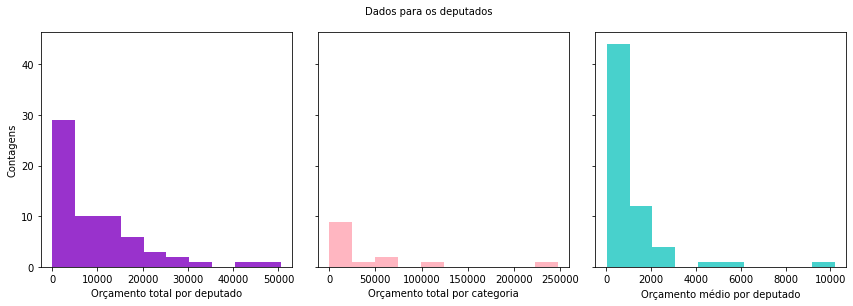

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharey=True)

axs[0].hist(df_total['VALOR'], density=False, color = 'darkorchid')
axs[0].set_ylabel('Contagens')
axs[0].set_xlabel('Orçamento total por deputado')

axs[1].hist(df_cat['VALOR'], density=False, color = 'lightpink')
axs[1].set_xlabel('Orçamento total por categoria')

axs[2].hist(df_conf['Média'], density=False, color = 'mediumturquoise')
axs[2].set_xlabel('Orçamento médio por deputado')

fig.tight_layout()
fig.text(0.5, 1.025, 'Dados para os deputados', ha='center')
plt.show()

Pelos gráficos acima, podemos ver que a distribuição dos três conjuntos de dados utilizados não tem a forma de uma distribuição normal ou de Student, se assemelhando mais a uma distribuição exponencial. Isto também indica que há uma distribuição desigual de cotas neste conjunto de dados, o que também foi observado nos valores de `N_COTAS` anteriormente.

O cálculo através da hipótese que $\sim t_{(n-1)}$ para as médias desses dados, portanto, não é adequado.